In [1]:
import numpy as np
import matplotlib.pyplot as plt

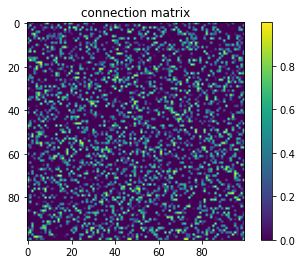

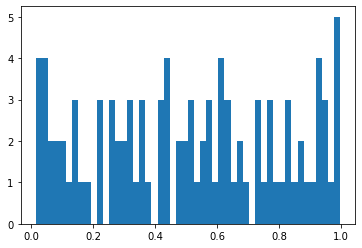

In [82]:
no_neurons = 100
sparsity = 0.7
M = (np.random.random((no_neurons,no_neurons))>sparsity).astype(np.float64)
M *= np.random.random((no_neurons,no_neurons))

A = np.arange(no_neurons**2).reshape(no_neurons,no_neurons)
x = (A//no_neurons)/no_neurons
y = (A%no_neurons)/no_neurons
#locality = 1.-np.abs(x-y)**0.2
#M *= locality

leackage = np.random.random(no_neurons)

plt.imshow(M)
plt.colorbar()
plt.title('connection matrix')
plt.show()

plt.hist(leackage,bins=50)
plt.show()

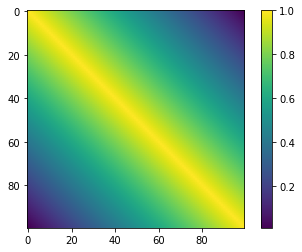

In [83]:
A = np.arange(no_neurons**2).reshape(no_neurons,no_neurons)
x = (A//no_neurons)/no_neurons
y = (A%no_neurons)/no_neurons
plt.imshow(1.-np.abs(x-y))
plt.colorbar()
plt.show()

In [88]:
a = 15
b = 0.3
def firing_function(V):
    sm = 1./(1+np.exp(-(V-a)*b))
    return np.random.random(V.shape)<sm

no_epochs = 400

voltage = np.zeros((no_epochs,no_neurons))
activity = np.zeros((no_epochs,no_neurons))
voltage[0] = np.random.random(no_neurons)
activity[0][5] = 1.


for i in range(1,no_epochs):
    voltage[i] = leackage*voltage[i-1]+M@activity[i-1]
    activity[i] = firing_function(voltage[i])

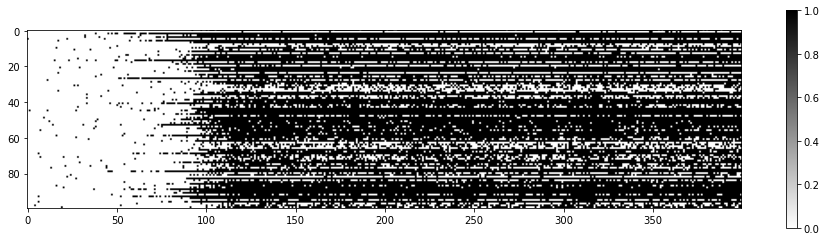

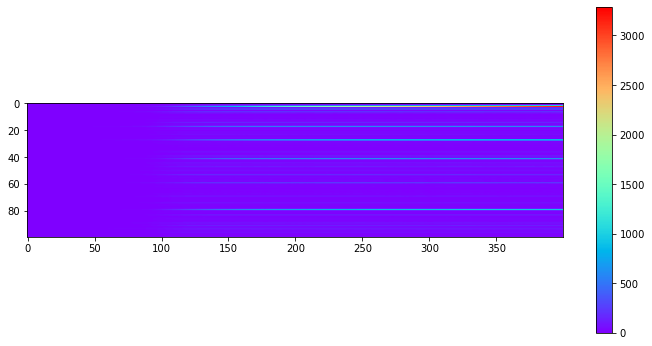

In [89]:
fig = plt.figure(figsize=(16,4))
plt.imshow(activity.T,cmap='gray_r')
plt.colorbar()
plt.show()

fig = plt.figure(figsize=(12,6))
plt.imshow(voltage.T,cmap='rainbow')
plt.colorbar()
plt.show()

In [95]:
A = np.random.randint(2,size=60)
index = [(5+i)%60 in range(-1,2,1)]
A[index]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 60 but corresponding boolean dimension is 1

In [9]:
B = np.array([True,False,False])
print(type(B))
print(isinstance(B,np.ndarray))

<class 'numpy.ndarray'>
True
